In [4]:
import pandas as pd
import numpy as np
import scanpy as sc
import sys
import scirpy as ir
sys.path.insert(0, '../mvTCR')
import tcr_embedding.utils_training as utils

In [5]:
# Put the .h5ad file read below in a folder named 'data' and put the folder 'data' in the 'mvTCR' folder.
# This way you won't get an error from the utils.load_data function
adata = utils.load_data('09_tcr_annotation_A_B_with_gender_data.h5ad')
#Put the best_model_by_metric.pt file in the mvTCR folder
model = utils.load_model(adata, path_model = 'best_model_by_metric_rna.pt')

In [6]:
latent_rna = model.get_latent(adata, metadata=['Sample', 'donor', 'organ', 'sort'], return_mean=True)

In [7]:
latent_rna.obs[list(adata.obs.columns)] = adata.obs[list(adata.obs.columns)]
latent_rna.obs.columns

Index(['batch', 'Sample', 'donor', 'organ', 'sort', 'method', 'file',
       'is_TRA_p', 'is_TRB_p', 'is_TRA_np', 'is_TRB_np', 'Age', 'Source',
       'cell types', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction',
       'multi_chain', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus',
       'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3',
       'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt',
       'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr',
       'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw',
       'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw',
       'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene',
       'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene',
       'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene',
       'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene',
       'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene',
       'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'I

In [10]:
sc.pp.neighbors(latent_rna, use_rep='X')

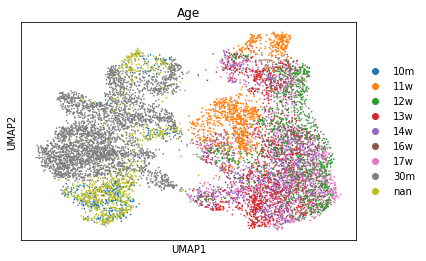

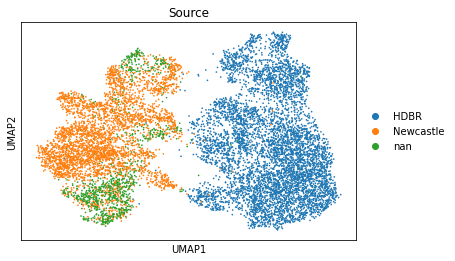

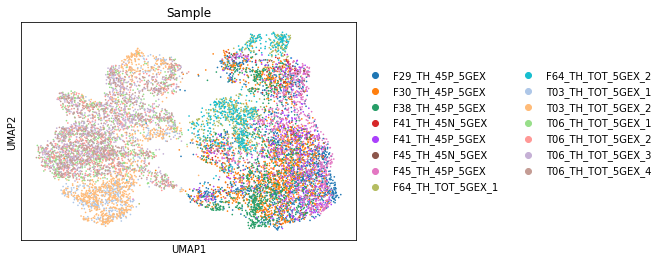

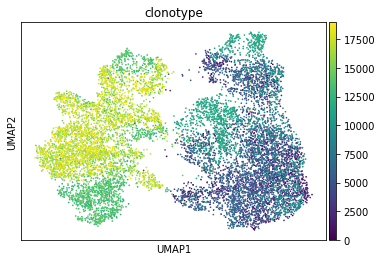

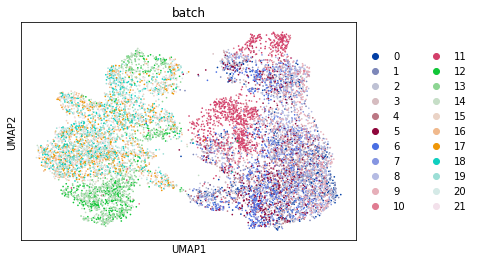

In [11]:
sc.tl.umap(latent_rna)
sc.pl.umap(latent_rna, color='Age')
sc.pl.umap(latent_rna, color='Source')
sc.pl.umap(latent_rna, color='Sample')
sc.pl.umap(latent_rna, color='clonotype')
sc.pl.umap(latent_rna, color='batch')

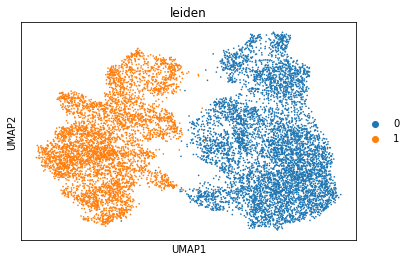

In [20]:
sc.tl.leiden(latent_rna, resolution = 0.05)
sc.pl.umap(latent_rna, color = "leiden")

In [21]:
path_tcr_anno_A_B_with_gender = './data/09_tcr_annotation_A_B_with_gender_data.h5ad'
adata = sc.read(adata=adata, filename=path_tcr_anno_A_B_with_gender)

In [22]:
adata.obs['leiden'] = latent_rna.obs['leiden']

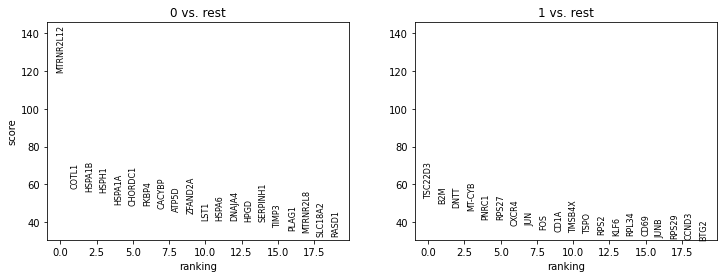

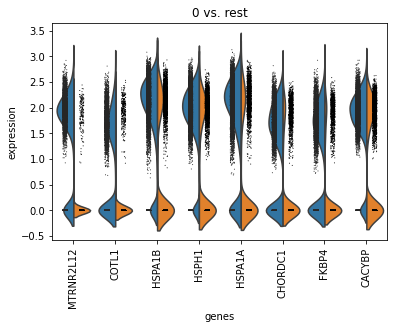

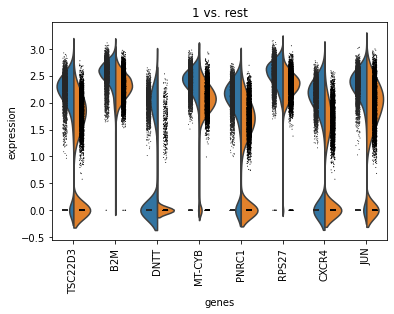

In [24]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)
sc.pl.rank_genes_groups_violin(adata, groups='1', n_genes=8)

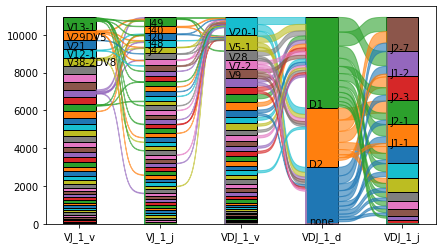

In [9]:
ax = ir.pl.vdj_usage(latent_rna, full_combination=False, max_segments=None, max_ribbons=30)